# 前处理

In [1]:
import dask
import re
import dask
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
#air
#reserve
df_air_reserve=pd.read_csv('~/Desktop/ml/restaurant_vistor/air_reserve.csv')
df_air_reserve['visit_date']=df_air_reserve['visit_datetime'].str.split().str[0]
df_air_reserve['visit_time']=df_air_reserve['visit_datetime'].str.split().str[1]
df_air_reserve['reserve_date']=df_air_reserve['reserve_datetime'].str.split().str[0]
df_air_reserve['reserve_time']=df_air_reserve['reserve_datetime'].str.split().str[1]
# group by store_id & visit_date
df_air_reserve_grouped=df_air_reserve.groupby(['air_store_id','visit_date']).sum()
df_air_reserve_grouped=df_air_reserve_grouped.reset_index()

#store info
df_air_store_info=pd.read_csv('~/Desktop/ml/restaurant_vistor/air_store_info.csv')

#visit
df_air_visit_data=pd.read_csv('~/Desktop/ml/restaurant_vistor/air_visit_data.csv')

#date info
df_date_info=pd.read_csv('~/Desktop/ml/restaurant_vistor/date_info.csv')

# join tables df_air_reserve_grouped, df_air_store_info & df_air_visit_data
df_air=df_air_reserve_grouped.merge(df_air_store_info, left_on='air_store_id', right_on='air_store_id', how='outer')
df_air=df_air.merge(df_air_visit_data, left_on=['air_store_id', 'visit_date'], right_on=['air_store_id', 'visit_date'], how='outer')

# join date_info
df_air=df_air.merge(df_date_info, left_on=['visit_date'], right_on=['calendar_date'], how='left')

df_air.drop(columns='calendar_date', inplace=True)

In [4]:
#hpg
# reserve & visit data
df_hpg_reserve=pd.read_csv('~/Desktop/ml/restaurant_vistor/hpg_reserve.csv')
df_hpg_reserve['visit_date']=df_hpg_reserve['visit_datetime'].str.split().str[0]
df_hpg_reserve['visit_time']=df_hpg_reserve['visit_datetime'].str.split().str[1]
df_hpg_reserve['reserve_date']=df_hpg_reserve['reserve_datetime'].str.split().str[0]
df_hpg_reserve['reserve_time']=df_hpg_reserve['reserve_datetime'].str.split().str[1]
# group by store_id & visit_date
df_hpg_reserve_grouped=df_hpg_reserve.groupby(['hpg_store_id', 'visit_date']).sum()
df_hpg_reserve_grouped=df_hpg_reserve_grouped.reset_index()

#store info
df_hpg_store_info=pd.read_csv('~/Desktop/ml/restaurant_vistor/hpg_store_info.csv')

# join tables df_hpg_reserve & df_hpg_store_info
df_hpg=df_hpg_reserve_grouped.merge(df_hpg_store_info, on='hpg_store_id', how='outer')

In [5]:
# join air & hpg
df_store_id_relation=pd.read_csv('~/Desktop/ml/restaurant_vistor/store_id_relation.csv')
df=df_air.merge(df_store_id_relation, on='air_store_id', how='left')
df=df.merge(df_hpg, on=['hpg_store_id', 'visit_date'], how='left')

In [6]:
df.head(5)

,air_store_id,visit_date,reserve_visitors_x,air_genre_name,air_area_name,latitude_x,longitude_x,visitors,day_of_week,holiday_flg,hpg_store_id,reserve_visitors_y,hpg_genre_name,hpg_area_name,latitude_y,longitude_y
0,air_00a91d42b08b08d9,2016-10-31,2.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,26.0,Monday,0.0,hpg_fbe603376b5980fc,2.0,NaN,NaN,NaN,NaN
1,air_00a91d42b08b08d9,2016-12-05,9.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,33.0,Monday,0.0,hpg_fbe603376b5980fc,1.0,NaN,NaN,NaN,NaN
2,air_00a91d42b08b08d9,2016-12-14,18.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,30.0,Wednesday,0.0,hpg_fbe603376b5980fc,NaN,NaN,NaN,NaN,NaN
3,air_00a91d42b08b08d9,2016-12-17,2.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,17.0,Saturday,0.0,hpg_fbe603376b5980fc,2.0,NaN,NaN,NaN,NaN
4,air_00a91d42b08b08d9,2016-12-20,4.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,37.0,Tuesday,0.0,hpg_fbe603376b5980fc,4.0,NaN,NaN,NaN,NaN


# air所有店铺整体人数变动

In [136]:
#mean of visitors
variation_over_time=df_air[['visit_date', 'reserve_visitors']].groupby(by='visit_date').mean().rename(columns={'reserve_visitors':'air_reserve_visitors_mean'})
variation_over_time['air_visitors_mean']=df_air[['visit_date', 'visitors']].groupby(by='visit_date').mean()
#sum of visitors
variation_over_time['air_reserve_visitors_all']=df_air[['visit_date', 'reserve_visitors']].groupby(by='visit_date').sum()
variation_over_time['air_visitors_all']=df_air[['visit_date', 'visitors']].groupby(by='visit_date').sum()
#number of stores
variation_over_time['store_num']=df_air[['visit_date', 'air_store_id']].groupby('visit_date').size().to_frame()

In [137]:
variation_over_time=variation_over_time.reset_index()
variation_over_time['visit_date']=pd.to_datetime(variation_over_time['visit_date'])
variation_over_time.set_index('visit_date', inplace=True)

In [138]:
variation_over_time.head(5)

,air_reserve_visitors_mean,air_visitors_mean,air_reserve_visitors_all,air_visitors_all,store_num
visit_date,,,,,
2016-01-01,5.666667,21.520833,17.0,1033.0,48
2016-01-02,18.285714,28.000000,128.0,1764.0,63
2016-01-03,8.833333,29.234568,53.0,2368.0,81
2016-01-04,7.176471,21.184713,122.0,3326.0,157
2016-01-05,4.470588,17.000000,76.0,3927.0,231


[]

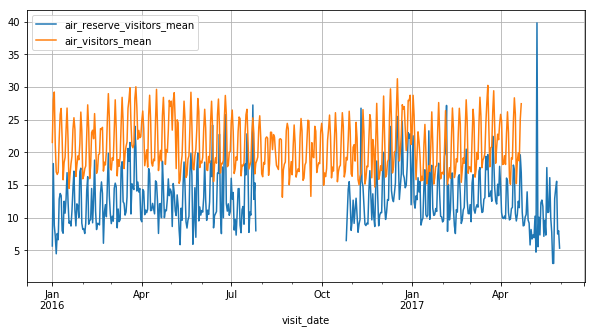

In [139]:
#平均人数变动
variation_over_time.plot(y=['air_reserve_visitors_mean', 'air_visitors_mean'], figsize=(10,5), grid=True)
ax.plot()

[]

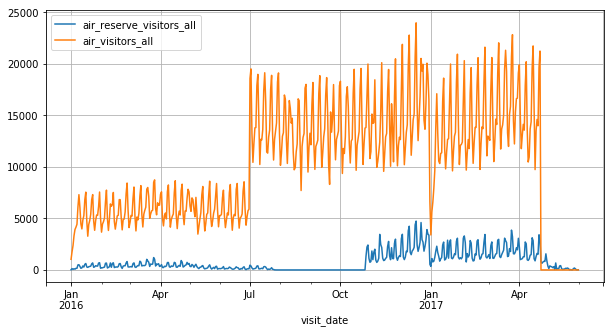

In [140]:
#人数总和变动
ax=variation_over_time.plot(y=['air_reserve_visitors_all', 'air_visitors_all'], figsize=(10,5), grid=True)
ax.plot()

[]

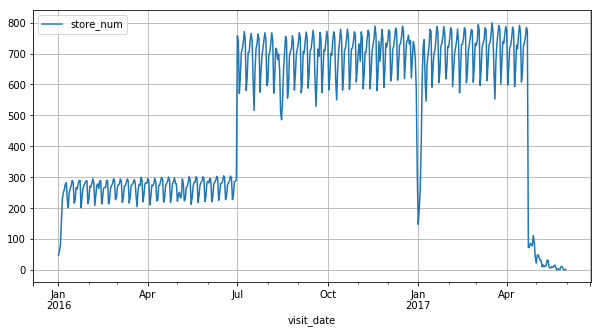

In [141]:
#有来访记录的店铺数变动
ax=variation_over_time.plot(y='store_num', figsize=(10,5), grid=True)
ax.plot()